## **MOVIE ANALYSIS AND RECOMMENDATION SYSTEM**

A brief overview of the datafields in our dataset.


*  User Id - an Id that represents a User
*   Movie Id - a unique Id for each Movie
*   Movie Title – The title of the movie
*  Rating- the rating given to the user for a movie
*  Timestamp – The date when the movie was released.
*  Genre- The genre of the movie
*  Title – The title of the movie
*    Imdb Id- Link to imdb source
*  tmbdId-identifier to link to other sources
*  Relevance – contains movie-tag relevance data
*   TagId – The tag given to a movie
*  Tag – contains the tag description



In [ ]:
from google.colab import drive  #drive import

In [ ]:
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/My Drive/Projects_Colab/DA Project/archive.zip'

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For the analysis and recommendation we will only be using 3 csv files namely movies.csv, tags.csv, ratings.csv.

In [ ]:
movies = pd.read_csv("movie.csv")

In [ ]:
rating = pd.read_csv('rating.csv')

In [ ]:
tags = pd.read_csv('tag.csv', sep=',')

Checking for null values.

In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
(tags.isnull()).sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [ ]:
tags=tags.dropna()

In [ ]:
(tags.isnull()).sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [ ]:
ratings.isna().sum()

rating       0
n_ratings    0
dtype: int64

## ANAYSIS ON THE MOVIE DATASET

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
len(movies.movieId.unique()) == len(movies.movieId)#checking if the movies are unique

True

Function to add year column to the movies dataframe

In [ ]:
#The ending of the movie title has the year in which the movie was released, we extract the year column fromm that and add it as a new column 
movies['year']=1
def makeYearCol(df):
  for i in range(len(df['title'])):
    y = df['title'][i].strip()[-5:-1]
    try:
      if int(y):
        df['title'][i] = df['title'][i][0:len(df['title'][i])-6]
        df['year'][i] = int(y)
      else:
        df['year'][i] = 0
    except:
      df['year'][i] = "yearNA"
      



Function call

In [ ]:
makeYearCol(movies)

In [ ]:
movies.head(30)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


Finding the genre set.

In [ ]:
genres = set()
for i in movies['genres']:
  li = i.split("|")
  for j in li:
      if j not in genres:
        genres.add(j.strip())

In [ ]:
genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

We add genre columns to the dataframe, setting its value to 1 if the movie belongs to the respective genre else 0.

In [ ]:
for i in genres:
  movies[i.strip()] = 0
for i in range(len(movies['genres'])):
  li = []
  li = movies['genres'][i].split("|")
  for j in li:
    movies[j][i] = 1

In [ ]:
movies.head(10)

,movieId,title,genres,year,Sci-Fi,Crime,Musical,Thriller,Fantasy,Children,Comedy,Horror,Drama,Documentary,Adventure,Mystery,Romance,IMAX,War,Western,Film-Noir,(no genres listed),Action,Animation
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Heat,Action|Crime|Thriller,1995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,7,Sabrina,Comedy|Romance,1995,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,8,Tom and Huck,Adventure|Children,1995,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,9,Sudden Death,Action,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10,GoldenEye,Action|Adventure|Thriller,1995,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
movies=movies.drop(labels=['genres'],axis=1)# Now we can safely drop the genres column

In [ ]:
movies.head(5)

,movieId,title,year,Drama,War,Comedy,Children,Adventure,Thriller,Animation,Sci-Fi,IMAX,Western,Fantasy,Romance,Action,Mystery,Documentary,Film-Noir,Musical,Horror,(no genres listed),Crime
0,1,Toy Story,1995,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,1995,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Remove the columns with no year available

In [ ]:
movies = movies[movies['year']!="yearNA"]

Now the cleaned movie dataset is stored is stored into a new csv file.

In [ ]:
movies.to_csv("cleaned_movie.csv")

In [ ]:
len(movies['movieId'])

27253

The number of movies of each genre 

In [ ]:
li_gen = {}
for i in genres:
  l1 = 0
  l1 = len(movies[movies[i]==1])
  li_gen[i] = l1
  

In [ ]:
li_gen

{'(no genres listed)': 237,
 'Action': 3518,
 'Adventure': 2329,
 'Animation': 1026,
 'Children': 1139,
 'Comedy': 8370,
 'Crime': 2938,
 'Documentary': 2467,
 'Drama': 13337,
 'Fantasy': 1411,
 'Film-Noir': 330,
 'Horror': 2611,
 'IMAX': 196,
 'Musical': 1034,
 'Mystery': 1513,
 'Romance': 4127,
 'Sci-Fi': 1740,
 'Thriller': 4177,
 'War': 1194,
 'Western': 676}

ANALYSIS ON THE RATINGS AND TAGS DATASET

In [ ]:
rating.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


The number of movies that have a rating more than 2.5

In [ ]:
seriesObj = rating.apply(lambda x: True if x['rating'] > 2.5 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows

16486759

Number of ratings given to each movie

In [ ]:
movie_count = rating[['movieId','rating']].groupby('movieId').count()
movie_count

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


Number of movies for each rating 

In [ ]:
ratings_count = rating[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


Average movie rating for each movie

In [ ]:
average_rating = rating[['movieId','rating']].groupby('movieId').mean()
average_rating

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
...,...
131254,4.000000
131256,4.000000
131258,2.500000


However we have to normalise the ratings which is done later below.

---



Merging rating and movie dataframes

In [ ]:
movies1 = movies.iloc[:,[0,1,2]]
df = movies1.merge(rating, on='movieId')

In [ ]:
df.head()

,movieId,title,year,userId,rating,timestamp
0,1,Toy Story,1995,3,4.0,1999-12-11 13:36:47
1,1,Toy Story,1995,6,5.0,1997-03-13 17:50:52
2,1,Toy Story,1995,8,4.0,1996-06-05 13:37:51
3,1,Toy Story,1995,10,4.0,1999-11-25 02:44:47
4,1,Toy Story,1995,11,4.5,2009-01-02 01:13:41


In [ ]:
df_grouped_by_movie = df.groupby('title').rating.sum()
df_grouped_by_movie_count = df.groupby('title').rating.count()

In [ ]:
df_grouped_by_movie_count.head(130)

title
#chicagoGirl: The Social Network Takes on a Dictator                         3
$ (Dollars)                                                                 24
$5 a Day                                                                    39
$9.99                                                                       55
$ellebrity (Sellebrity)                                                      2
                                                                          ... 
180° South (180 Degrees South) (180° South: Conquerors of the Useless)       3
187 (One Eight Seven)                                                      696
1900 (Novecento)                                                           236
1911 (Xinhai geming)                                                         3
1939: Hollywood's Greatest Year                                              5
Name: rating, Length: 130, dtype: int64

In [ ]:
all_movies=sorted(df['title'].unique())

In [ ]:
#finding the popular movies
def popular(all,df):
  li = []
  for i in range(len(all)):
    li.append([all[i],df[i]])
  
  return sorted(li,key=lambda x:x[1],reverse=True)[0:150]
all = popular(all_movies,df_grouped_by_movie_count)

In [ ]:
#finding the genre
def find_genre(df,top150):
  li = []
  for i in top150:
    rslt_df = df.loc[df['title'] == i[0]]
    temp=[]
    for j in rslt_df.columns[3:]:
      try:
        if(rslt_df[j].item() == 1):
          temp.append(j)
      except:
        continue
    
    li.append([i[0],temp])

  
  return li
genres_list_top150 = find_genre(movies,all)

In [ ]:
highest_genre={}
for i in genres_list_top150:
  for j in i[1]:
    if(j not in highest_genre):
      highest_genre[j]=1
    else:
      highest_genre[j]+=1

The number of popular movies, grouped by genre

In [ ]:
highest_genre

{'Action': 51,
 'Adventure': 44,
 'Animation': 7,
 'Children': 12,
 'Comedy': 50,
 'Crime': 30,
 'Drama': 52,
 'Fantasy': 19,
 'Film-Noir': 1,
 'Horror': 7,
 'IMAX': 2,
 'Musical': 2,
 'Mystery': 10,
 'Romance': 27,
 'Sci-Fi': 30,
 'Thriller': 39,
 'War': 8,
 'Western': 1}

Normalize ratings to avoid outliers and get accurate results

In [ ]:
Mean= df.groupby(['movieId'], as_index = False, sort = False).mean().rename(columns = {'rating': 'rating_mean'})[['movieId','rating_mean']]

In [ ]:
Ratings = pd.merge(df,Mean,on = 'movieId', how = 'left', sort = False)
Ratings['rating_adjusted']=Ratings['rating']-Ratings['rating_mean']
Ratings

,movieId,title,year,userId,rating,timestamp,rating_mean,rating_adjusted
0,1,Toy Story,1995,3,4.0,1999-12-11 13:36:47,3.92124,0.07876
1,1,Toy Story,1995,6,5.0,1997-03-13 17:50:52,3.92124,1.07876
2,1,Toy Story,1995,8,4.0,1996-06-05 13:37:51,3.92124,0.07876
3,1,Toy Story,1995,10,4.0,1999-11-25 02:44:47,3.92124,0.07876
4,1,Toy Story,1995,11,4.5,2009-01-02 01:13:41,3.92124,0.57876
...,...,...,...,...,...,...,...,...
19999799,131254,Kein Bund für's Leben,2007,79570,4.0,2015-03-30 19:32:59,4.00000,0.00000
19999800,131256,"Feuer, Eis & Dosenbier",2002,79570,4.0,2015-03-30 19:48:08,4.00000,0.00000
19999801,131258,The Pirates,2014,28906,2.5,2015-03-30 19:56:32,2.50000,0.00000
19999802,131260,Rentun Ruusu,2001,65409,3.0,2015-03-30 19:57:46,3.00000,0.00000


In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(100) #average ratings

title
The Secret Country: The First Australians Fight Back     5.0
Death of a Nation - The Timor Conspiracy                 5.0
Victor and the Secret of Crocodile Mansion               5.0
Turkish Dance, Ella Lola                                 5.0
Bandaged                                                 5.0
                                                        ... 
1971                                                     5.0
Mutantes                                                 5.0
Blue Swallow (Cheong yeon)                               5.0
Bill Hicks: Sane Man                                     5.0
Best of Ernie and Bert, The                              5.0
Name: rating, Length: 100, dtype: float64

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10) #number of ratings

title
Pulp Fiction                           67310
Forrest Gump                           66172
Shawshank Redemption, The              63366
Silence of the Lambs, The              63299
Jurassic Park                          59715
Star Wars: Episode IV - A New Hope     54502
Braveheart                             53769
Terminator 2: Judgment Day             52244
Matrix, The                            51334
Schindler's List                       50054
Name: rating, dtype: int64

In [ ]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean()) #creating a ratings data frame with two columns
ratings['n_ratings'] = df.groupby('title')['rating'].count()

In [ ]:
ratings

,rating,n_ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator,3.666667,3
$ (Dollars),2.833333,24
$5 a Day,2.871795,39
$9.99,3.009091,55
$ellebrity (Sellebrity),2.000000,2
...,...,...
À propos de Nice,3.125000,4
Árido Movie,2.000000,1
Åsa-Nisse - Wälkom to Knohult,1.500000,2


In [ ]:
ratings.sort_values('n_ratings', ascending=False)

,rating,n_ratings
title,,
Pulp Fiction,4.174231,67310
Forrest Gump,4.029000,66172
"Shawshank Redemption, The",4.446990,63366
"Silence of the Lambs, The",4.177057,63299
Jurassic Park,3.664741,59715
...,...,...
"High Tech, Low Life",3.500000,1
High Test Girls,2.500000,1
High Time (Big Daddy),2.000000,1


## **DATA VISUALISATION**

Number of movies in each genre<br>Drama is the most popular genre

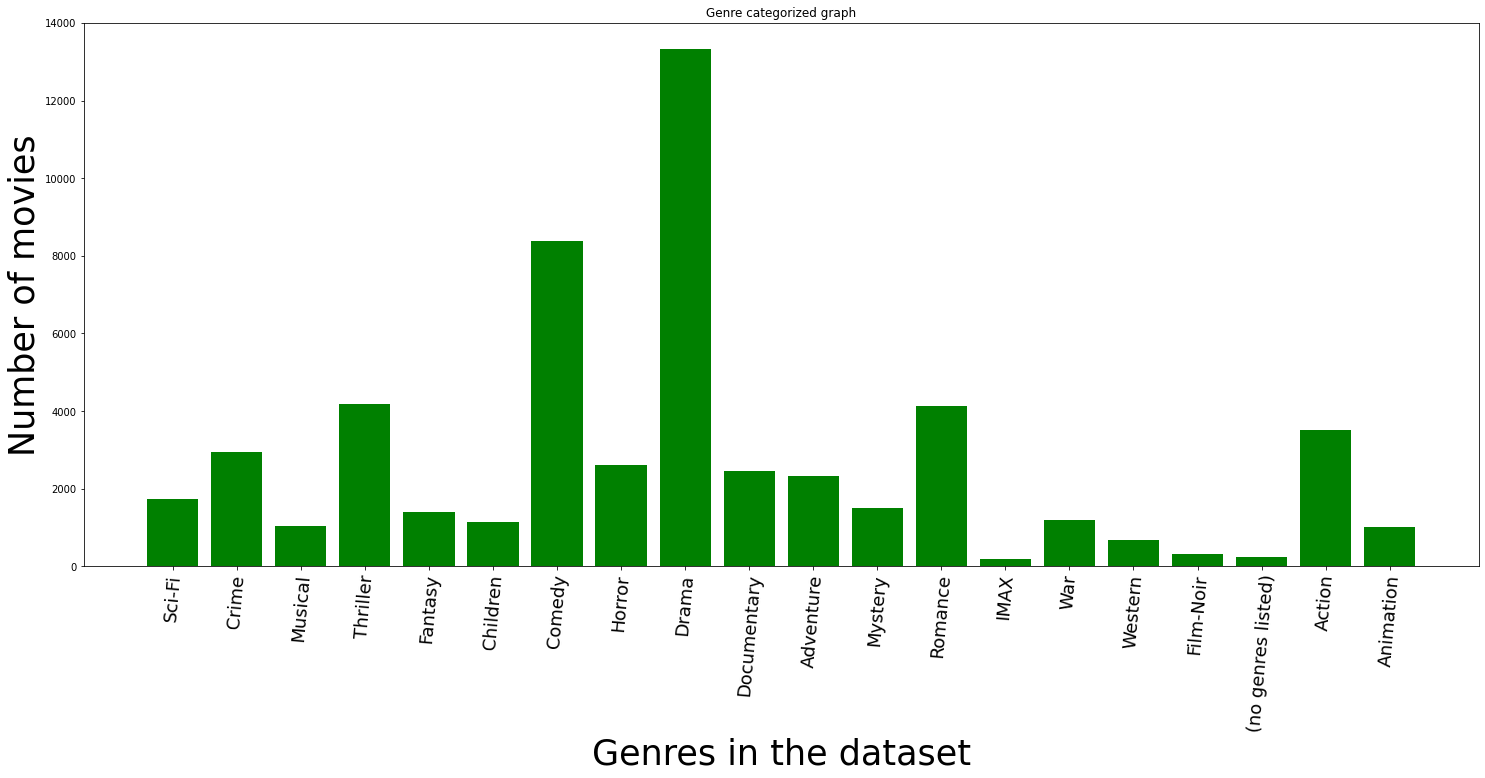

In [ ]:
x = li_gen.keys()
values = list(li_gen.values())


x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(25,10))
plt.bar(x_pos, values, color='green')
plt.xlabel("Genres in the dataset",fontsize=35)
plt.ylabel("Number of movies",fontsize=35)
plt.title("Genre categorized graph")

plt.xticks(x_pos, x,fontsize=18,rotation=85)

plt.savefig("movie_VS_genre.jpg")
plt.show()

In the form of a piechart.


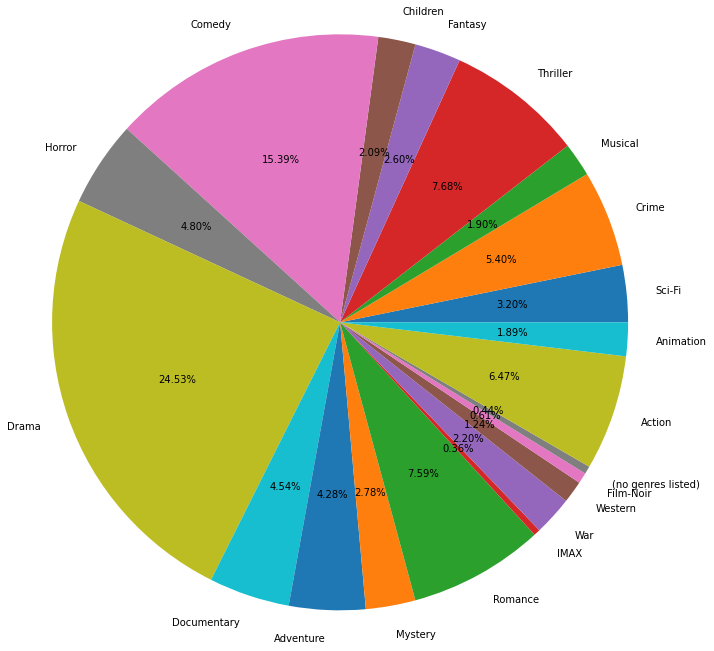

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = li_gen.keys()
students = li_gen.values()
ax.pie(students, labels = langs,autopct='%1.2f%%',radius=2.5)
plt.savefig("pie_chart.jpg")
plt.show()

Movies released per year<br>
Many movies were released in the 2000's

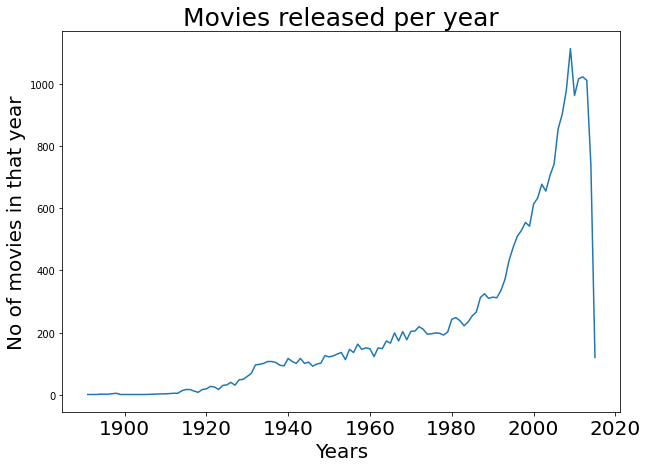

In [ ]:
no_of_movies_year = list(movies.groupby(['year']).size())
years = list(sorted(set(movies['year'])))
plt.figure(figsize=(10,7))
plt.plot(years,no_of_movies_year)
plt.xticks(fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("No of movies in that year",fontsize=20)
plt.title("Movies released per year",fontsize=25)
plt.savefig("movies_per_year.jpg")
plt.show()

Genre word cloud

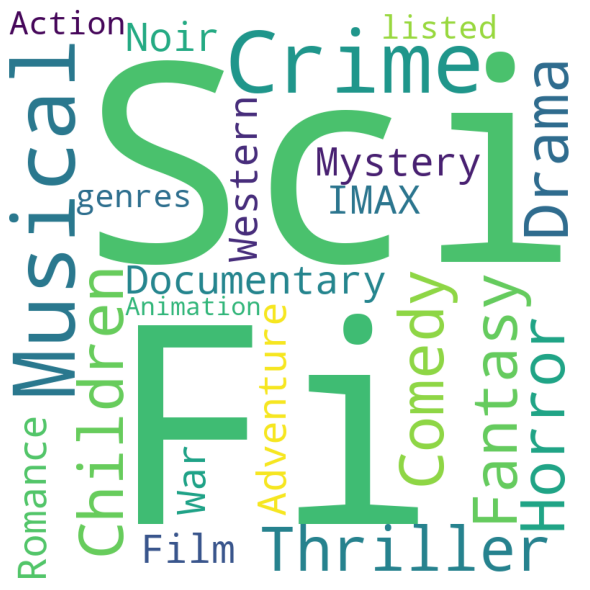

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                
                min_font_size = 10).generate(' '.join(genres)) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("genre_word_cloud.jpg")
plt.show() 

Now we plot a bar graph based on the year.<br>
You will be asked to enter an year and on that basis you will see a bar graph for that year

In [ ]:
def plot_bar_graph(dictionary,xlab,ylab,title):
  x = dictionary.keys()
  values = list(dictionary.values())


  x_pos = [i for i, _ in enumerate(x)]
  plt.figure(figsize=(25,10))
  plt.bar(x_pos, values, color='green')
  plt.xlabel(xlab,fontsize=35)
  plt.ylabel(ylab,fontsize=35)
  plt.title(title)

  plt.xticks(x_pos, x,fontsize=18,rotation=85)


  plt.show()

Enter a year :1995


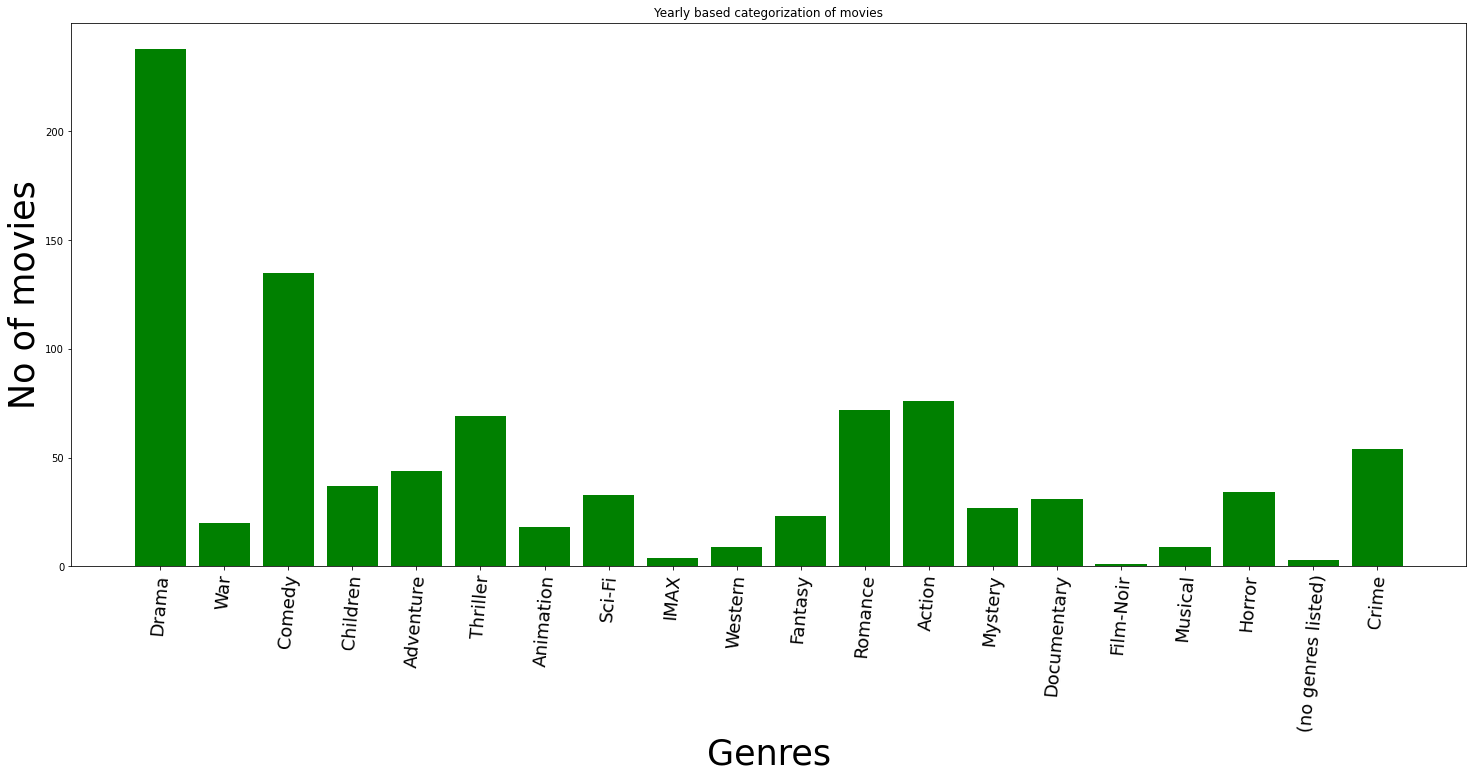

In [ ]:
n = int(input("Enter a year :"))
try:
  y_index = years.index(n)
  df = movies.groupby(movies['year']).sum()

  yearly_genre = {}
  for i in genres:
    yearly_genre[i] = df[i][n]
  plot_bar_graph(yearly_genre,"Genres","No of movies","Yearly based categorization of movies")
except:
  print("The movies in this year does not exist in the dataset")

Ratings histogram, we realize that many movies have a good rating

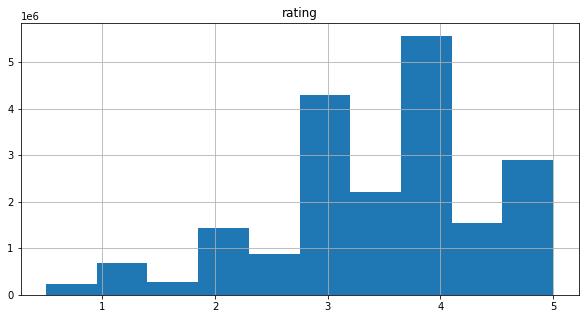

In [ ]:
rating.hist(column='rating', figsize=(10,5))
plt.savefig("ratingshist.jpg")

In the form of a box plot

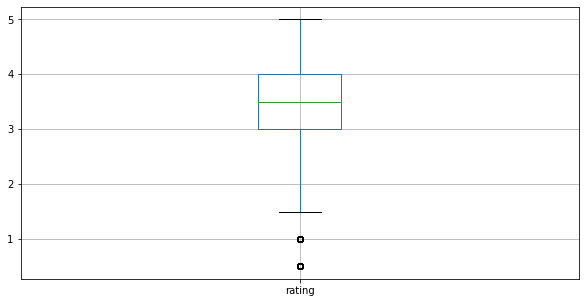

In [ ]:
rating.boxplot(column='rating', figsize=(10,5))
plt.savefig("ratingsboxplot.jpg")

Number of ratings a movie was given <br>Here we see that only the first few movies were given so many ratings, hence it is necessary to normalize.

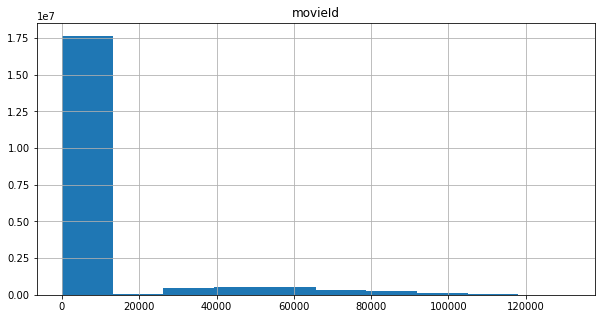

In [ ]:
rating.hist(column='movieId', figsize=(10,5))
plt.savefig("numrforeachmovie.jpg")

The number of movies per rating <br> We see that most of the movies were given a rating of 4

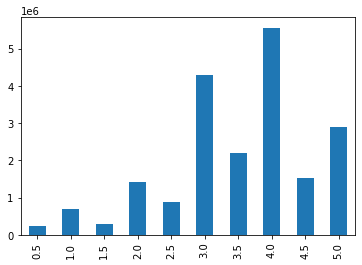

In [ ]:
rating['rating'].value_counts().sort_index().plot.bar()
plt.savefig("ratingcounts.jpg")

However we have to perform normalisation to get more accurate results 

Hence the new ratings are visualised as below

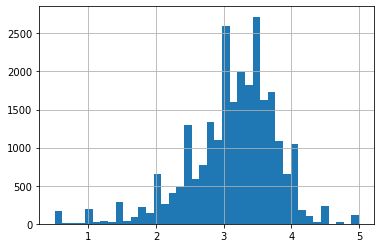

In [ ]:
ratings['rating'].hist(bins=40)
plt.savefig("ratingsnorm.jpg")

For a particular movie

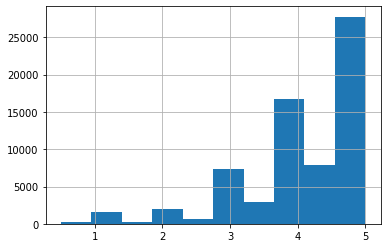

In [ ]:
df[df['title']=="Pulp Fiction "]['rating'].hist()
plt.savefig("ratingpulpfic.jpg")

The common tags for the movies.

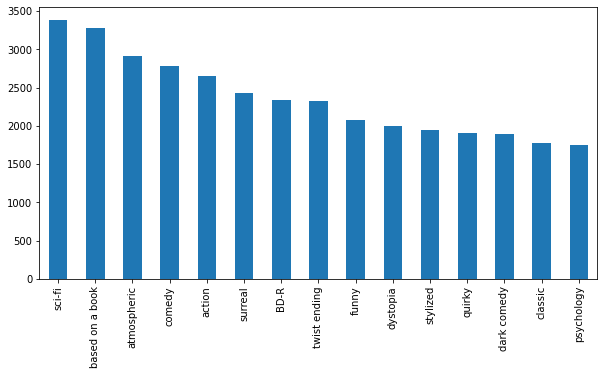

In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts[:15].plot(kind='bar', figsize=(10,5))
plt.savefig("commontags.jpg")

The wordcloud for tags

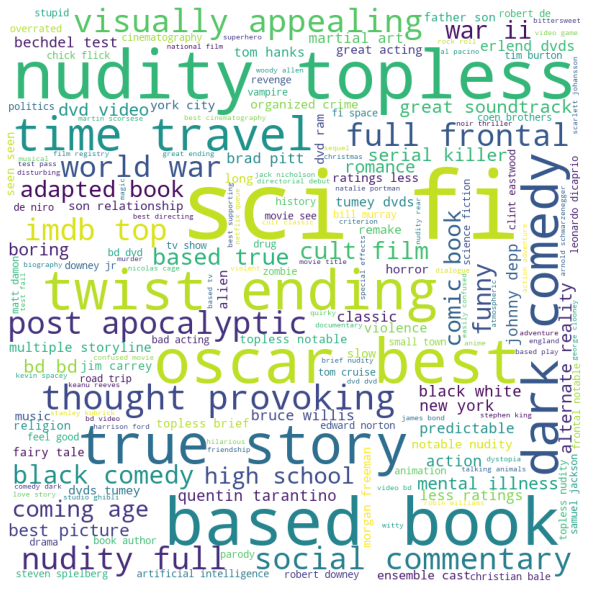

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tags.tag: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("tags_word_cloud.jpg")  
plt.show() 

Most watched genre out of the top 150 movies

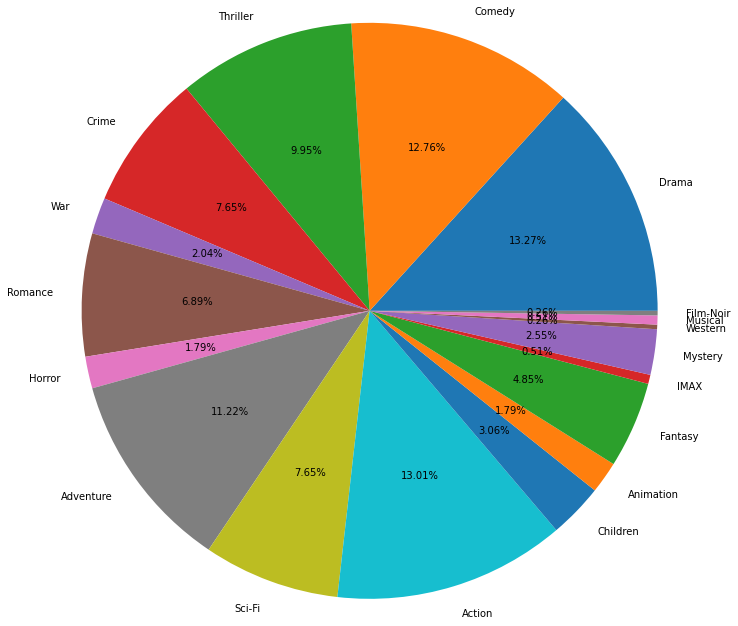

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = highest_genre.keys()
students = highest_genre.values()
ax.pie(students, labels = langs,autopct='%1.2f%%',radius=2.5)

plt.savefig("pop150.jpeg")
plt.show()


### RECOMMENDATION SYSTEM

To avoid increased variance in our data, we take movies that have the number of ratings between 1500 and 5000. <br>(Moreover even if we wanted to use the others for more concentrated results, colab has a limited memory and hence it cannot process that many ratings)

In [ ]:
ratings=ratings[(ratings['n_ratings']>1500) & (ratings['n_ratings']<=5000)]

In [ ]:
ratings

,rating,n_ratings
title,,
"'burbs, The",3.067391,3220
*batteries not included,3.245087,1730
"10,000 BC",2.513688,1863
102 Dalmatians,2.392517,1577
127 Hours,3.740986,2496
...,...,...
Young Sherlock Holmes,3.367736,2650
Zack and Miri Make a Porno,3.359043,1880
Zero Effect,3.714522,2417


We now form the pivot_table

In [ ]:
subset = df.iloc[0:int(len(df['title'])/6)]

movie_ratings= subset.pivot_table(values='rating', index='userId', columns='title')



In [ ]:
movies

,movieId,title,year,Drama,War,Comedy,Children,Adventure,Thriller,Animation,Sci-Fi,IMAX,Western,Fantasy,Romance,Action,Mystery,Documentary,Film-Noir,Musical,Horror,(no genres listed),Crime
0,1,Toy Story,1995,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,1995,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier",2002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates,2014,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


We fill all the null values with zero

In [ ]:
movie_ratings = movie_ratings.fillna(value=0)

In [ ]:
movie_ratings.to_csv("movieratings.csv")

We use pearson correlation for the movies to perform item-item collaborative filtering

In [ ]:
corr_matrix = movie_ratings.corr(method='pearson', min_periods=100)

In [ ]:
corr_matrix

title,8 Seconds,Above the Rim,Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Across the Sea of Time,Addams Family Values,"Addiction, The","Adventures of Priscilla, Queen of the Desert, The","Age of Innocence, The","Air Up There, The",Airheads,Amateur,"Amazing Panda Adventure, The","American President, The",Angela,Angels and Insects,Anne Frank Remembered,Another Stakeout,Antonia's Line (Antonia),Apollo 13,Assassins,"Awfully Big Adventure, An",Babe,"Baby-Sitters Club, The","Babysitter, The",Backbeat,Bad Boys,Bad Company,Bad Girls,Balto,Barcelona,"Basketball Diaries, The",Batman Forever,Beautiful Girls,Beauty of the Day (Belle de jour),Bed of Roses,Before Sunrise,Before and After,Before the Rain (Pred dozhdot),Being Human,...,True Lies,Twelve Monkeys (a.k.a. 12 Monkeys),Two Bits,Two Crimes (Dos crímenes),Two if by Sea,"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les)",Under Siege 2: Dark Territory,Underneath,Unforgettable,Unstrung Heroes,Unzipped,Up Close and Personal,"Usual Suspects, The",Vampire in Brooklyn,Vanya on 42nd Street,Village of the Damned,Virtuosity,Waiting to Exhale,"Walk in the Clouds, A","Walking Dead, The","War, The",Waterworld,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A)",What Happened Was...,What's Eating Gilbert Grape,What's Love Got to Do with It?,When Night Is Falling,When a Man Loves a Woman,While You Were Sleeping,"White Balloon, The (Badkonake sefid)",White Man's Burden,White Squall,Widows' Peak,Wild Bill,Wings of Courage,With Honors,Wolf,"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die)",Wyatt Earp,"Young Poisoner's Handbook, The"
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8 Seconds,1.000000,0.108848,0.042879,0.044213,0.012707,0.037363,0.015300,0.026812,0.041042,0.138824,0.067387,0.012861,0.030676,0.072690,0.015366,0.019769,0.017999,0.076557,0.011472,0.047809,0.059353,0.020521,0.038878,0.053697,0.029870,0.048745,0.060871,0.040866,0.056920,0.030107,0.018506,0.072620,0.029252,0.068959,0.013039,0.071397,0.021045,0.045692,0.016055,0.029480,...,0.047233,0.022302,0.016084,0.009747,0.047986,0.016499,0.031097,0.024990,0.029951,0.048745,0.013565,0.051018,0.028273,0.041833,0.012572,0.032655,0.041121,0.061750,0.074854,0.038312,0.056441,0.028727,0.048848,0.014378,0.050442,0.055949,0.024295,0.071602,0.047738,0.007509,0.063310,0.077203,0.009704,0.059609,0.000873,0.105308,0.061911,0.014231,0.071606,0.010884
Above the Rim,0.108848,1.000000,0.057435,0.058221,0.005394,0.032419,0.018734,0.013383,0.018287,0.165754,0.085069,0.014621,0.013435,0.038789,0.003513,0.014941,0.012327,0.050447,0.003129,0.028114,0.067398,0.018231,0.019653,0.018340,0.029868,0.046141,0.090900,0.041353,0.028606,0.013438,0.015289,0.084683,0.030378,0.040365,0.008553,0.016954,0.029342,0.023611,0.013612,0.019628,...,0.030127,0.029290,0.004476,0.007375,0.018950,0.008952,0.032793,0.015916,0.037581,0.023909,0.010291,0.020418,0.038758,0.058481,0.006930,0.041070,0.055831,0.041759,0.026783,0.045763,0.052200,0.031486,0.046695,0.016995,0.032801,0.033987,0.007954,0.026239,0.013794,0.007810,0.054336,0.041209,0.004811,0.039747,0.004831,0.085445,0.046659,0.005863,0.048938,0.014632
Ace Ventura: Pet Detective,0.042879,0.057435,1.000000,0.558140,0.008455,0.365865,0.010426,0.065248,0.046463,0.089422,0.226160,0.023061,0.041107,0.176927,0.003305,-0.001696,-0.001220,0.164091,-0.017569,0.389958,0.179890,0.024174,0.246826,0.059337,0.069770,0.027006,0.242140,0.055719,0.110239,0.039208,0.051505,0.096419,0.507319,0.039796,0.014081,0.014279,0.061898,0.010607,0.005850,0.057542,...,0.453582,0.207869,-0.001396,0.008143,0.030121,-0.003662,0.224176,0.020421,0.021194,0.039581,0.022539,0.003306,0.179491,0.122944,-0.000226,0.082614,0.161035,0.079122,0.100072,0.038066,0.078588,0.405881,0.089783,0.014612,0.185233,0.100131,0.002181,0.107798,0.305256,-0.006105,0.056683,0.010928,0.031119,0.038476,0.004434,0.128307,0.141570,-0.007870,0.137774,0.012968
Ac

We save the matrix to csv

In [ ]:
corr_matrix.to_csv("CorrMATRIX.csv")

#`WodRec System`

We made a constructor class that reads the matrix.<br>The function find_all_sim finds all the movies similar to the movies the user has watched.<br>For example, suppose a user has watched x movies, we find all the movies similar to each movie using the corr_matrix.<br>We then scale it to the respective rating and sort it in the descending order.<br>The get_filtered function returns the movies mapped to its title ensuring that a movie that the user has watched hasn't been recommended again. <br>The final function returns the top 10 recommendations.

In [ ]:
class WodRec:
  def __init__(self):
    self.movie_ratings = pd.read_csv("CorrMATRIX.csv")
  def find_all_sim(self,movie,user):
    simCandidates = pd.Series()
    myRatings = movie.loc[user]
    for i in range(0, len(myRatings.index)):
        
        # Retrieve similar movies to the movie 
        sims = corr_matrix[myRatings.index[i]].dropna()
        # Now scale its similarity by how well the movie was rated
        sims = sims.map(lambda x: x * myRatings[i])
        # Add the score to the list of similarity candidates
        simCandidates = simCandidates.append(sims)
        
    
    simCandidates.sort_values(inplace = True, ascending = False)
    simCandidates = simCandidates.groupby(simCandidates.index).sum()
    return simCandidates
  def get_filtered(self,movie,user,simCandidates):
    #map these movie_id to the movie name
    new1 = []
    gg1=[]
    
    for i in movie.columns:
      if(movie.loc[user][i]!=0.0):
        gg1.append(i)
     
    s = simCandidates.index.values.tolist()
    for i in simCandidates.index.values:
      if(i in gg1):
        continue
      new1.append([i,simCandidates[s.index(i)]])
    return new1
  def output(self,new_list):
    #outputs the recommended movie
    return sorted(new_list,key=lambda x:x[1],reverse=True)[0:10]

In [ ]:
def get_output(df,user):
  new_user = WodRec()
  sim = new_user.find_all_sim(df,user)
  filteredCandi = new_user.get_filtered(df,user,sim)
  print([i[0] for i in new_user.output(filteredCandi)])

In [ ]:
get_output(movie_ratings,410)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


['Pulp Fiction ', 'Seven (a.k.a. Se7en) ', 'Léon: The Professional (a.k.a. The Professional) (Léon) ', 'Fugitive, The ', 'Braveheart ', 'Forrest Gump ', 'Apollo 13 ', 'Twelve Monkeys (a.k.a. 12 Monkeys) ', 'Quiz Show ', 'Casino ']


Other movies watched by user 410<br>Lord of the Rings: The Return of the King, The (2003)<br>
Monty Python's And Now for Something Completely Different (1971)<br>
Usual Suspects, The (1995)<br> Which are similar to the recommended movies.

In [ ]:
get_output(movie_ratings,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


['Clear and Present Danger ', 'Outbreak ', 'In the Line of Fire ', 'Batman Forever ', 'Die Hard: With a Vengeance ', 'Net, The ', 'Crimson Tide ', 'While You Were Sleeping ', 'Forrest Gump ', 'Waterworld ']
